<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

In [2]:
import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br>
    <span style="font-size: 22px; color: green;"> :: FACTS 1.0 run</span>
</span>

In [3]:
ssp='ssp585'
path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])

<span style="font-size: 22px; color: green;"> :: FACTS 1.0 20K run</span>

In [4]:
ssp='ssp585'
path20k = f'/scratch/pk695/FACTS/002_fork/facts/experiments-DUMP/experiments.TEST/exp_k14/coupling.{ssp}.20k/output'
files20k=fn.list_files_with_names(path20k, ["global", "AIS"])

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [5]:
#
start_year=2020; end_year=2300; unit='cm'; station=0

# AIS from the Kopp_14 module.
AIS_k14_path=f'{path20k}/coupling.ssp585.20k.k14ice.kopp14.icesheets_AIS_globalsl.nc'
var = 'k14'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Deconto_16 module.
AIS_d16_path=f'{path20k}/coupling.ssp585.20k.deconto16.deconto16.AIS_AIS_globalsl.nc'
var = 'd16'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC AR5 module.
AIS_ar5_path=f'{path}/coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
var = 'ar5'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC Deconto_21 module.
AIS_d21_path=f'{path}/coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc'
var = 'd21'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [6]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [7]:
T1=2020; T2=2100; T3=2300;

var = 'k14'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")
var = 'd16'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")

T1=2020; T2=2100; T3=2150;
var = 'ar5'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")
var = 'd21'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")

Text(0.95, 0.95, 'k14')

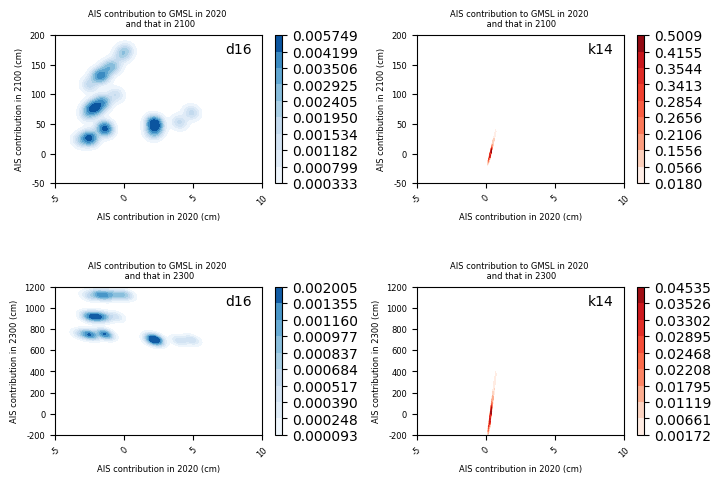

In [8]:
fig = plt.figure(figsize=(8, 15))
gs = gridspec.GridSpec(5, 2, figure=fig);  
plt.subplots_adjust(wspace=0.4, hspace=0.7)
# ==============================================================================================================
# PLOT left panel.<
ax = fig.add_subplot(gs[0, 0])
sns.kdeplot(x=d16_2020, y=d16_2100, fill=True, cmap="Blues", cbar=True)
#
# cbar = ax.collections[0].colorbar
# cbar.set_norm(LogNorm(vmin=np.min(d16_2020), vmax=np.max(d16_2300)))
#
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-50, 201, 50));  ax.set_yticklabels(np.arange(-50, 201, 50),fontsize=6) ;
ax.text(0.95, 0.95, 'd16', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)


# PLOT right panel.<
ax = fig.add_subplot(gs[0, 1])
sns.kdeplot(x=k14_2020, y=k14_2100, fill=True, cmap="Reds", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-50, 201, 50));  ax.set_yticklabels(np.arange(-50, 201, 50),fontsize=6) ;
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)


# PLOT bottom left panel.<
ax = fig.add_subplot(gs[1, 0])
sns.kdeplot(x=d16_2020, y=d16_2300, fill=True, cmap="Blues", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2300", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2300 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-200, 1200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-200, 1201, 200));  ax.set_yticklabels(np.arange(-200, 1201, 200),fontsize=6) ;
ax.text(0.95, 0.95, 'd16', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)

# PLOT bottom right panel.<
ax = fig.add_subplot(gs[1, 1])
sns.kdeplot(x=k14_2020, y=k14_2300, fill=True, cmap="Reds", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2300", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2300 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-200, 1201, 200));  ax.set_yticklabels(np.arange(-200, 1201, 200),fontsize=6) ;
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)




<span style="font-size: 22pt; color: blue; font-family: 'Times New Roman'; background-color: yellow;"> Latest mod to above for log scale  </span>

/home/pk695/000_swre/miniconda/envs/plot/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


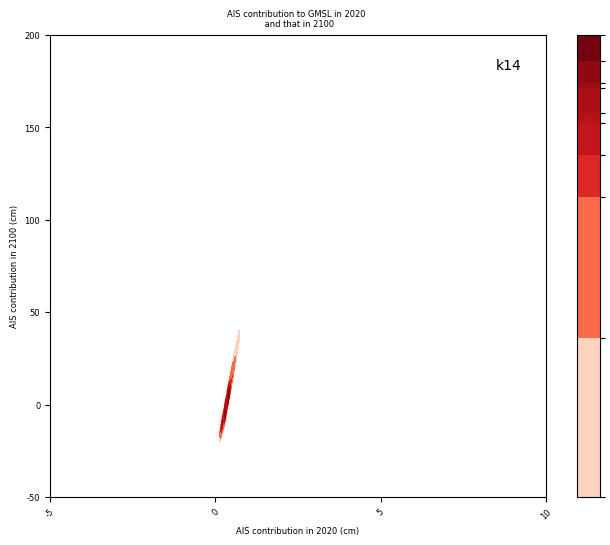

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#
fig = plt.figure(figsize=(8, 6)) ;
gs = fig.add_gridspec(1, 1);
ax = fig.add_subplot(gs[0]);
#
sns.kdeplot(x=k14_2020, y=k14_2100, fill=True, cmap="Reds", cbar=True, norm=LogNorm());
#
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6);
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6);
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6);
#
ax.set_xlim(-5, 10);
ax.set_ylim(-50, 200);
ax.set_xticks(np.arange(-5, 11, 5));
ax.set_xticklabels(np.arange(-5, 11, 5), fontsize=6, rotation=45);
ax.set_yticks(np.arange(-50, 201, 50));
ax.set_yticklabels(np.arange(-50, 201, 50), fontsize=6);
#
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10);
plt.show();

/home/pk695/000_swre/miniconda/envs/plot/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


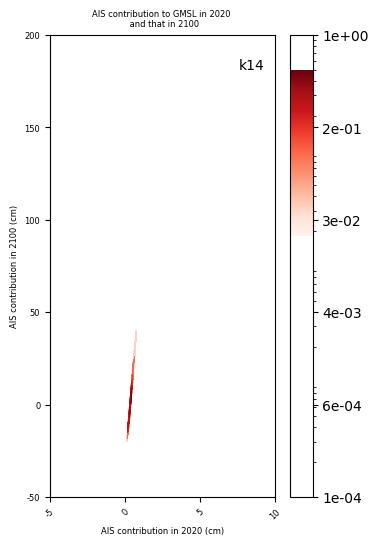

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
#
fig = plt.figure(figsize=(8, 6))  
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 1])
#
norm = LogNorm()
sns.kdeplot(x=k14_2020, y=k14_2100, fill=True, cmap="Reds", cbar=False,  norm=norm)
#
lower_bound = 1e-4  
upper_bound = 1e0   
#
num_ticks = 6 
tick_values = np.logspace(np.log10(lower_bound), np.log10(upper_bound), num=num_ticks)
#
mappable = ScalarMappable(norm=norm, cmap="Reds")
mappable.set_array([]) 
#
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_ticks(tick_values)
cbar.set_ticklabels(['{:.0e}'.format(tick) for tick in tick_values])
#
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
#
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5))
ax.set_xticklabels(np.arange(-5, 11, 5), fontsize=6, rotation=45)
ax.set_yticks(np.arange(-50, 201, 50))
ax.set_yticklabels(np.arange(-50, 201, 50), fontsize=6)
#
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)
plt.show()


<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">